# Mapping of the Fire of Varibobi (Attica) Fire

## Background

The current notebook makes a basic mapping of the fire using Sentinel-2 cloud-free data and NBR index. 

### Normalized Burn Ratio
The Normalized Burn Ratio (NBR) considered to be an index that makes usage of the difference in the way healthy green vegetation and burnt vegetation reflect light to find burnt area. The equation based on two bands is defined below:
$$
NBR = \frac{(NIR - SWIR)}{(NIR + SWIR)}
$$

NBR returns values between -1 and 1, but in this example we shifted this values to range -1000,1000 so to avoid float values. Healthy green vegetation yields a high NBR value, whereas burnt vegetation is related to a low value. Areas of dry, brown vegetation or bare soil should also record lower NBR values than green vegetation.

### Delta Normalized Burn Ratio
The Delta Normalized Burn Ratio (dNBR) is calculated by subtracting the post-fire NBR value from the pre-fire NBR value as defined in this equation:

$$
dNBR = NBR_{pre_fire} - NBR_{post fire}
$$

The dNBR value is considered to be more useful than the NBR alone to the determination of the burning area as it showcases the change from the pre-fire state. A burnt area yields a positive dNBR value, on the contrary with  negative dNBR value or a value close to zero that reveals an unburnt area. 

### Load Libraries

In [61]:
import os,sys
from osgeo import gdal, ogr, osr
import numpy as np
import matplotlib.pyplot as plt

### Load and visualize RGB images before and after the fire

Text(0.5, 1.0, 'RGB 08 August - After the fire')

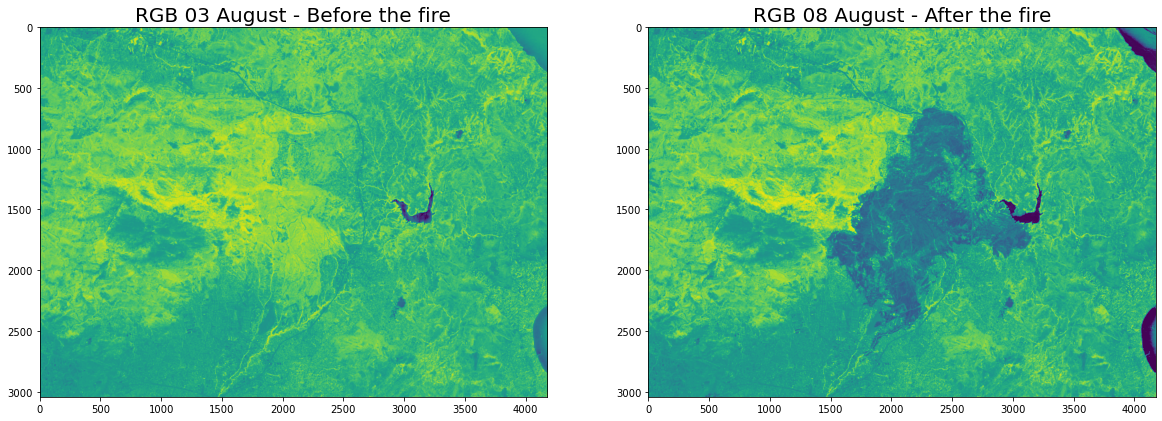

In [62]:
rgb_pre = 'August032021_NBR_INDEX.tif'
rgb_pro = 'August082021_NBR_INDEX.tif'

rgb_pre_ds = gdal.Open(rgb_pre) 
rgb_post_ds = gdal.Open(rgb_pro) 

rgb_pre_data = rgb_pre_ds.GetRasterBand(1).ReadAsArray()
rgb_post_data = rgb_post_ds.GetRasterBand(1).ReadAsArray()

f, axarr = plt.subplots(1, 2, figsize=(20, 7))
axarr[0].imshow(rgb_pre_data)
axarr[1].imshow(rgb_post_data)
axarr[0].set_title("RGB 03 August - Before the fire", fontsize=20) 
axarr[1].set_title("RGB 08 August - After the fire", fontsize=20) 

### Load the pre-calculated NBR indices, calculate dNBR, set a threshold for burnt pixels and finally visualize

Text(0.5, 1.0, 'NBR after')

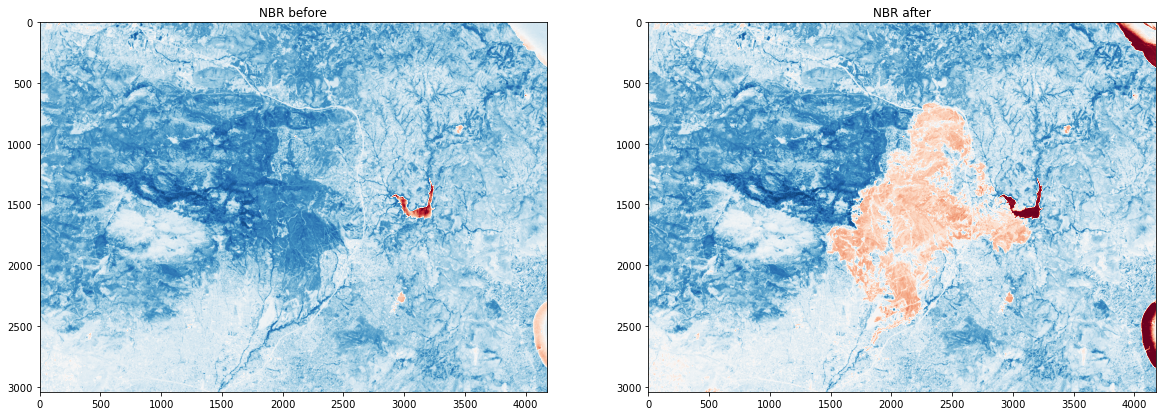

In [63]:
nbr_pre = 'August032021_NBR_INDEX.tif'
nbr_pro = 'August082021_NBR_INDEX.tif'

nbr_pre_ds = gdal.Open(nbr_pre) 
nbr_post_ds = gdal.Open(nbr_pro) 

nbr_pre_data = nbr_pre_ds.GetRasterBand(1).ReadAsArray()
nbr_post_data = nbr_post_ds.GetRasterBand(1).ReadAsArray()

delta_NBR = nbr_pre_data - nbr_post_data

# Set threshold for burnt pixels
threshold = 0.5

# Apply threshold
burnt = delta_NBR > threshold

# Mask post-fire true colour image
masked = np.where(delta_NBR > threshold, delta_NBR, np.nan)

f, axarr = plt.subplots(1, 2, figsize=(20, 7))
axarr[0].imshow(nbr_pre_data,cmap='RdBu')
axarr[0].set_title("NBR before")
axarr[0].margins(100,100)
axarr[1].imshow(nbr_post_data,cmap='RdBu')
axarr[1].set_title("NBR after")

Text(0.5, 1.0, 'Burnt Area')

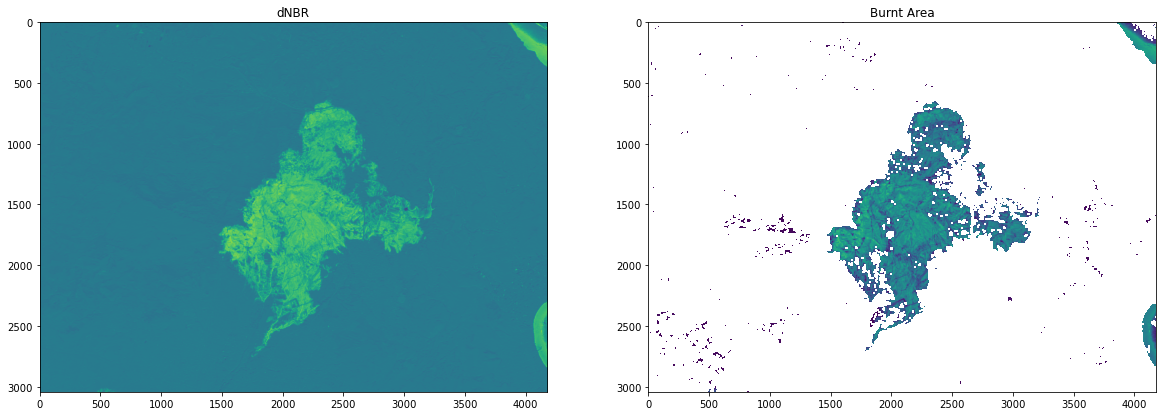

In [64]:
f, axarr = plt.subplots(1, 2, figsize=(20, 7))
axarr[0].imshow(delta_NBR)
axarr[0].set_title("dNBR")
axarr[1].imshow(masked)
axarr[1].set_title("Burnt Area")